In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from fair_algortihms import DetGreedy, DetCons, DetRelax, DetConstSort

# Your original dataset
data = {
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['Jay Park', 'IU', 'Zico', 'Nayeon', 'Sejeong', 'Yoo Seung-ho'],
    'gender': ['M', 'F', 'M', 'F', 'F', 'M'],
    'age': [35, 28, 29, 26, 25, 22],
    'genres': [['Hip hop', 'R&B'], ['K-pop', 'Folk'], ['Hip hop', 'Rap'], ['K-pop', 'Dance'], ['K-pop', 'Ballad'], ['Ballad', 'Folk']],
    'likes': [5000000, 8000000, 3000000, 6000000, 1000000, 0],
    'newcomer': [False, False, False, False, False, True]
}

# Transforming the dataset to fit the algorithm's expected input format
transformed_data = {}
k_max = 6  # Maximum number of times any entity might be accessed

for i in range(len(data['likes'])):
    for count in range(k_max):  # Create entries for each count up to k_max - 1
        transformed_data[(i, count)] = data['likes'][i]

# Probabilities, assuming newcomers should be given higher chance
probabilities = [2 if newcomer else 1 for newcomer in data['newcomer']]
total_prob = sum(probabilities)
p = [prob / total_prob for prob in probabilities]  # Normalized probabilities

In [4]:
# Running the algorithms
results_DetGreedy = DetGreedy(transformed_data, p, k_max)
results_DetCons = DetCons(transformed_data, p, k_max)
results_DetRelax = DetRelax(transformed_data, p, k_max)
results_DetConstSort = DetConstSort(transformed_data, p, k_max)

# Preparing the data for plotting
# For simplicity, let's assume we're interested in the scores (likes) of the ranked items
scores_DetGreedy = results_DetGreedy['score'].tolist()
scores_DetCons = results_DetCons['score'].tolist()
scores_DetRelax = results_DetRelax['score'].tolist()
scores_DetConstSort = results_DetConstSort['score'].tolist()

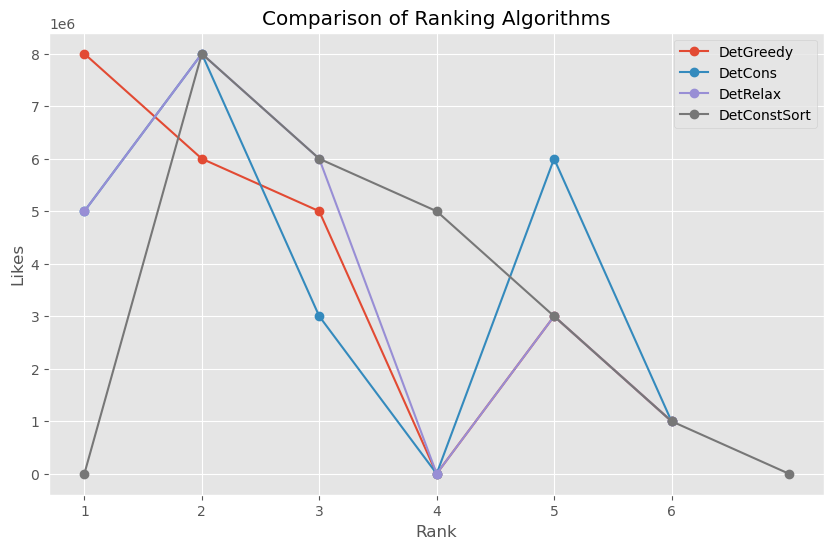

In [6]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

algorithms = ['DetGreedy', 'DetCons', 'DetRelax', 'DetConstSort']
scores = [scores_DetGreedy, scores_DetCons, scores_DetRelax, scores_DetConstSort]

for score, algorithm in zip(scores, algorithms):
    plt.plot(score, label=algorithm, marker='o')

plt.legend()
plt.xlabel("Rank")
plt.ylabel("Likes")
plt.title("Comparison of Ranking Algorithms")
plt.xticks(np.arange(k_max), np.arange(1, k_max + 1))
plt.show()

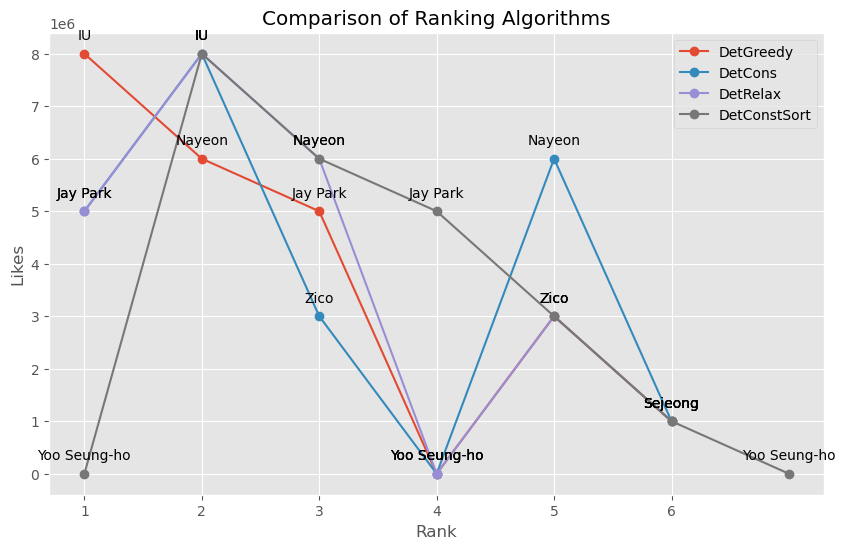

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Extract names for annotations
names = data['name']

names_DetGreedy = [names[ai] for ai in results_DetGreedy['ai']]
names_DetCons = [names[ai] for ai in results_DetCons['ai']]
names_DetRelax = [names[ai] for ai in results_DetRelax['ai']]
names_DetConstSort = [names[ai] for ai in results_DetConstSort['ai']]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

algorithms = ['DetGreedy', 'DetCons', 'DetRelax', 'DetConstSort']
#scores_X are the lists of scores for each algorithm
scores = [scores_DetGreedy, scores_DetCons, scores_DetRelax, scores_DetConstSort]
#names_X are the lists of names for each algorithm
names_list = [names_DetGreedy, names_DetCons, names_DetRelax, names_DetConstSort]

for score, name_list, algorithm in zip(scores, names_list, algorithms):
    x_values = np.arange(len(score))
    plt.plot(x_values, score, label=algorithm, marker='o')
    for i, txt in enumerate(name_list):
        ax.annotate(txt, (x_values[i], score[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.xlabel("Rank")
plt.ylabel("Likes")
plt.title("Comparison of Ranking Algorithms")
plt.xticks(np.arange(k_max), np.arange(1, k_max + 1))
plt.show()